<a href="https://colab.research.google.com/github/ronakvaghela454/CN6005-Portfolio/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [12]:
df = pd.read_csv("/content/Groceries_dataset.csv")

# Display first 5 rows
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [14]:
basket = (
    df.groupby(['Member_number', 'Date'])['itemDescription']
    .apply(list)
    .reset_index()
)

transactions = basket['itemDescription'].tolist()

print(transactions[:5])  # show first 5 transactions


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables']]


In [15]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [16]:
frequent_itemsets = apriori(
    df_encoded,
    min_support=0.01,
    use_colnames=True
)

print("Frequent Itemsets:", frequent_itemsets.shape[0])
frequent_itemsets.head()


Frequent Itemsets: 69


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)


from matplotlib import pyplot as plt
_df_12['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('itemsets').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['itemsets'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='support', y='itemsets', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [17]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.1
)

# Keep only meaningful rules
rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) >= 1)) &
    (rules['consequents'].apply(lambda x: len(x) >= 1))
]

print("Association Rules:", rules.shape[0])

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)


Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


from matplotlib import pyplot as plt
_df_16['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['lift'].plot(kind='hist', bins=20, title='lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('antecedents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['lift'].plot(kind='line', figsize=(8, 4), title='lift')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['antecedents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='support', y='antecedents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['antecedents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='confidence', y='antecedents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['antecedents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='lift', y='antecedents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

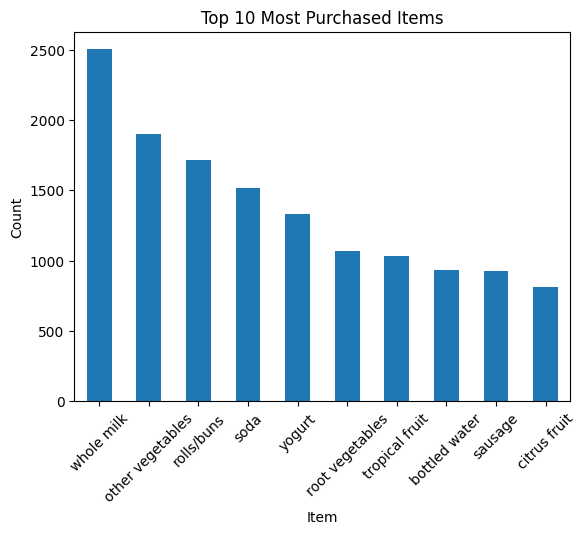

In [18]:
top_items = df['itemDescription'].value_counts().head(10)

top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
